In [1]:
import pandas as pd
from pandas_datareader import data as pdr
import yfinance as yf
import datetime as dt
import numpy as np
yf.pdr_override()
import matplotlib.pyplot as plt
from math import sqrt
from math import floor

In [2]:
ticker = yf.download('^IXIC',start ="2010-01-20", end  = "2023-05-01" )['Close']
ticker1 = yf.download('^NSEI',start ="2010-01-01", end  = "2023-04-11")['Close']
ticker.corr(ticker1)
# correlation of nasdaq and nse 
## the direction we are moving is positive and strength is quite high 

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


0.9512481243372104

In [3]:
ticker.corr(ticker1.shift())
#taking nasdaq as leading and nse as lagging 


0.950682511458961

In [4]:
ticker.corr(ticker1.shift(20))
#we get that the correlation decreases so this not the correct lead lag relationship

0.9411931324659544

In [5]:
ticker1.corr(ticker.shift())

0.9515490820200023

In [6]:
ticker1.corr(ticker.shift(155))
# this is the max correlation we are getting for any time period 

0.9676574164593844

In [7]:
ticker1.corr(ticker.shift(20))
# but as we are constrained with taking 20 days as the lagging period so we have to take this as max in our case 
#as we can see nasdaq is behind so nasdaq is lagging and nse is leading

0.9531303455496966

In [8]:
# I think nasdaq should be chosen for optimisating parameters as the nse future data is dependent on the movement of stocks in nasdaq

In [9]:
# code for macd lines
df = yf.download("^NSEI","2010-01-01" ,"2023-05-01")
def get_macd(price, slow, fast, smooth):
    exp1 = price.ewm(span = fast, adjust = False).mean()
    exp2 = price.ewm(span = slow, adjust = False).mean()
    macd = pd.DataFrame(exp1 - exp2).rename(columns = {'close':'macd'})
    signal = pd.DataFrame(macd.ewm(span = smooth, adjust = False).mean()).rename(columns = {'macd':'signal'})
    frames =  [macd, signal]
    df = pd.concat(frames, join = 'inner', axis = 1)
    return df

df_macd = get_macd(df['Close'], 26, 12, 9)
df_macd.tail()

[*********************100%***********************]  1 of 1 completed


,Close,Close
Date,,
2023-04-24,89.150961,58.377980
2023-04-25,95.090728,65.720530
2023-04-26,102.198597,73.016143
2023-04-27,114.695755,81.352066
2023-04-28,135.141663,92.109985


In [10]:
# code for buy and sell dates for nasdaq for  macd lines 
def implement_macd_strategy(prices, data):    
    buy_price = []
    sell_price = []
    macd_signal = []
    signal = 0

    for i in range(len(data)):
        if data.iloc[:,0][i] > data.iloc[:,1][i]:
            if signal != 1:
                buy_price.append(prices.index[i])
                sell_price.append(np.nan)
                signal = 1
                macd_signal.append(signal)
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                macd_signal.append(0)
        elif data.iloc[:,0][i] < data.iloc[:,1][i]:
            if signal != -1:
                buy_price.append(np.nan)
                sell_price.append(prices.index[i])
                signal = -1
                macd_signal.append(signal)
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                macd_signal.append(0)
        else:
            buy_price.append(np.nan)
            sell_price.append(np.nan)
            macd_signal.append(0)
            
    return buy_price, sell_price, macd_signal
            
buy_price, sell_price, macd_signal = implement_macd_strategy(df['Close'], df_macd)
buy_price= [incom for incom in buy_price if str(incom) != 'nan']
buy_price

[Timestamp('2010-01-05 00:00:00'),
 Timestamp('2010-01-15 00:00:00'),
 Timestamp('2010-02-16 00:00:00'),
 Timestamp('2010-05-31 00:00:00'),
 Timestamp('2010-07-12 00:00:00'),
 Timestamp('2010-08-19 00:00:00'),
 Timestamp('2010-09-06 00:00:00'),
 Timestamp('2010-11-04 00:00:00'),
 Timestamp('2010-12-03 00:00:00'),
 Timestamp('2010-12-14 00:00:00'),
 Timestamp('2011-02-15 00:00:00'),
 Timestamp('2011-03-23 00:00:00'),
 Timestamp('2011-05-30 00:00:00'),
 Timestamp('2011-06-27 00:00:00'),
 Timestamp('2011-07-25 00:00:00'),
 Timestamp('2011-08-30 00:00:00'),
 Timestamp('2011-09-29 00:00:00'),
 Timestamp('2011-10-10 00:00:00'),
 Timestamp('2011-12-02 00:00:00'),
 Timestamp('2011-12-27 00:00:00'),
 Timestamp('2012-01-03 00:00:00'),
 Timestamp('2012-04-03 00:00:00'),
 Timestamp('2012-04-18 00:00:00'),
 Timestamp('2012-05-28 00:00:00'),
 Timestamp('2012-08-02 00:00:00'),
 Timestamp('2012-09-12 00:00:00'),
 Timestamp('2012-11-29 00:00:00'),
 Timestamp('2013-01-03 00:00:00'),
 Timestamp('2013-01-

In [11]:
sell_price= [incom for incom in sell_price if str(incom) != 'nan']
sell_price

[Timestamp('2010-01-12 00:00:00'),
 Timestamp('2010-01-19 00:00:00'),
 Timestamp('2010-04-12 00:00:00'),
 Timestamp('2010-07-02 00:00:00'),
 Timestamp('2010-07-28 00:00:00'),
 Timestamp('2010-08-25 00:00:00'),
 Timestamp('2010-10-08 00:00:00'),
 Timestamp('2010-11-12 00:00:00'),
 Timestamp('2010-12-09 00:00:00'),
 Timestamp('2011-01-07 00:00:00'),
 Timestamp('2011-03-21 00:00:00'),
 Timestamp('2011-04-18 00:00:00'),
 Timestamp('2011-06-16 00:00:00'),
 Timestamp('2011-07-18 00:00:00'),
 Timestamp('2011-07-26 00:00:00'),
 Timestamp('2011-09-26 00:00:00'),
 Timestamp('2011-10-03 00:00:00'),
 Timestamp('2011-11-11 00:00:00'),
 Timestamp('2011-12-12 00:00:00'),
 Timestamp('2011-12-30 00:00:00'),
 Timestamp('2012-02-23 00:00:00'),
 Timestamp('2012-04-09 00:00:00'),
 Timestamp('2012-04-24 00:00:00'),
 Timestamp('2012-07-13 00:00:00'),
 Timestamp('2012-08-29 00:00:00'),
 Timestamp('2012-10-09 00:00:00'),
 Timestamp('2012-12-17 00:00:00'),
 Timestamp('2013-01-10 00:00:00'),
 Timestamp('2013-01-

In [12]:
# taking dates between buy and sell dates to calculate the metrices
mask7 = (df.index > '2010-01-05 ') & (df.index <= '2010-01-12')
print(df.loc[mask7])
mask8 = df.loc[mask7]

                   Open         High          Low        Close    Adj Close   
Date                                                                          
2010-01-06  5278.149902  5310.850098  5260.049805  5281.799805  5281.799805  \
2010-01-07  5281.799805  5302.549805  5244.750000  5263.100098  5263.100098   
2010-01-08  5264.250000  5276.750000  5234.700195  5244.750000  5244.750000   
2010-01-11  5263.799805  5287.200195  5227.799805  5249.399902  5249.399902   
2010-01-12  5251.100098  5300.500000  5200.950195  5210.399902  5210.399902   

            Volume  
Date                
2010-01-06       0  
2010-01-07       0  
2010-01-08       0  
2010-01-11       0  
2010-01-12       0  


[*********************100%***********************]  1 of 1 completed


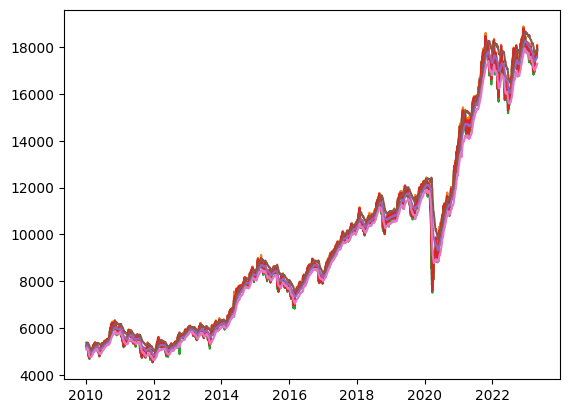

In [13]:
# code for keltner channel and graph of the same 
intc = yf.download("^NSEI","2010-01-01" ,"2023-05-01")
def get_kc(high, low, close, lookback_period, multiplier, atr_lookback):
    tr1 = pd.DataFrame(high - low)
    tr2 = pd.DataFrame(abs(high - close.shift()))
    tr3 = pd.DataFrame(abs(low - close.shift()))
    frames = [tr1, tr2, tr3]
    tr = pd.concat(frames, axis = 1, join = 'inner').max(axis = 1)
    atr = tr.ewm(alpha = 1/atr_lookback).mean()
    
    middle = close.ewm(lookback_period).mean()
    upper = close.ewm(lookback_period).mean() + multiplier * atr
    lower = close.ewm(lookback_period).mean() - multiplier * atr
    
    return middle, upper, lower
    
intc = intc.iloc[:,:4]
intc['middle'], intc['upper'], intc['lower'] = get_kc(intc['High'], intc['Low'], intc['Close'], 20, 2, 10)
plt.plot(intc)
plt.show()


In [14]:
# stratergy for calculating buy and sell dates in keltner channel .
def implement_kc_strategy(prices, kc_upper, kc_lower):
    buy_date = []
    sell_date = []
    kc_signal = []
    signal = 0
    
    for i in range(len(prices)-1):
        if prices[i] < kc_lower[i] and prices[i+1] > prices[i]:
            if signal != 1:
                buy_date.append(prices.index[i])
                sell_date.append(np.nan)
                signal = 1
                kc_signal.append(signal)
            else:
                buy_date.append(np.nan)
                sell_date.append(np.nan)
                kc_signal.append(0)
        elif prices[i] > kc_upper[i] and prices[i+1] < prices[i]:
            if signal != -1:
                buy_date.append(np.nan)
                sell_date.append(prices.index[i])
                signal = -1
                kc_signal.append(signal)
            else:
                buy_date.append(np.nan)
                sell_date.append(np.nan)
                kc_signal.append(0)
        else:
            buy_date.append(np.nan)
            sell_date.append(np.nan)
            kc_signal.append(0)
            
    return buy_date, sell_date, kc_signal

buy_date, sell_date, kc_signal = implement_kc_strategy(intc['Close'], intc['upper'], intc['lower'])
sell_date= [incom for incom in sell_date if str(incom) != 'nan']
sell_date

[Timestamp('2010-03-08 00:00:00'),
 Timestamp('2010-06-21 00:00:00'),
 Timestamp('2011-03-31 00:00:00'),
 Timestamp('2011-07-07 00:00:00'),
 Timestamp('2011-10-28 00:00:00'),
 Timestamp('2012-01-20 00:00:00'),
 Timestamp('2012-06-29 00:00:00'),
 Timestamp('2013-04-25 00:00:00'),
 Timestamp('2013-07-15 00:00:00'),
 Timestamp('2013-09-19 00:00:00'),
 Timestamp('2014-02-28 00:00:00'),
 Timestamp('2015-01-29 00:00:00'),
 Timestamp('2015-07-06 00:00:00'),
 Timestamp('2015-10-19 00:00:00'),
 Timestamp('2016-03-23 00:00:00'),
 Timestamp('2017-01-12 00:00:00'),
 Timestamp('2018-04-24 00:00:00'),
 Timestamp('2018-12-19 00:00:00'),
 Timestamp('2019-05-20 00:00:00'),
 Timestamp('2019-09-23 00:00:00'),
 Timestamp('2020-06-03 00:00:00'),
 Timestamp('2020-10-14 00:00:00'),
 Timestamp('2022-01-05 00:00:00'),
 Timestamp('2022-04-04 00:00:00'),
 Timestamp('2022-07-22 00:00:00'),
 Timestamp('2022-11-01 00:00:00'),
 Timestamp('2023-04-13 00:00:00')]

In [15]:
buy_date= [incom for incom in buy_date if str(incom) != 'nan']
buy_date

[Timestamp('2010-01-27 00:00:00'),
 Timestamp('2010-05-07 00:00:00'),
 Timestamp('2011-01-11 00:00:00'),
 Timestamp('2011-05-05 00:00:00'),
 Timestamp('2011-08-09 00:00:00'),
 Timestamp('2011-11-21 00:00:00'),
 Timestamp('2012-05-04 00:00:00'),
 Timestamp('2013-02-26 00:00:00'),
 Timestamp('2013-06-13 00:00:00'),
 Timestamp('2013-08-02 00:00:00'),
 Timestamp('2014-02-04 00:00:00'),
 Timestamp('2014-12-17 00:00:00'),
 Timestamp('2015-03-27 00:00:00'),
 Timestamp('2015-08-24 00:00:00'),
 Timestamp('2015-11-13 00:00:00'),
 Timestamp('2016-11-04 00:00:00'),
 Timestamp('2018-03-07 00:00:00'),
 Timestamp('2018-09-24 00:00:00'),
 Timestamp('2019-05-13 00:00:00'),
 Timestamp('2019-07-25 00:00:00'),
 Timestamp('2020-02-03 00:00:00'),
 Timestamp('2020-09-24 00:00:00'),
 Timestamp('2021-11-26 00:00:00'),
 Timestamp('2022-02-14 00:00:00'),
 Timestamp('2022-05-13 00:00:00'),
 Timestamp('2022-09-29 00:00:00'),
 Timestamp('2022-12-23 00:00:00')]

In [16]:
#taking dates between buy and sell dates for calculating metrices
mask = (intc.index > '2010-01-27 ') & (intc.index <= '2010-03-08')
mask2 = intc.loc[mask]

In [17]:
# another set of dates between buy and sell dates of keltner code 
mask1 = (intc.index > '2010-05-07') & (intc.index <= '2010-06-21')
mask3 = intc.loc[mask1]


[*********************100%***********************]  1 of 1 completed


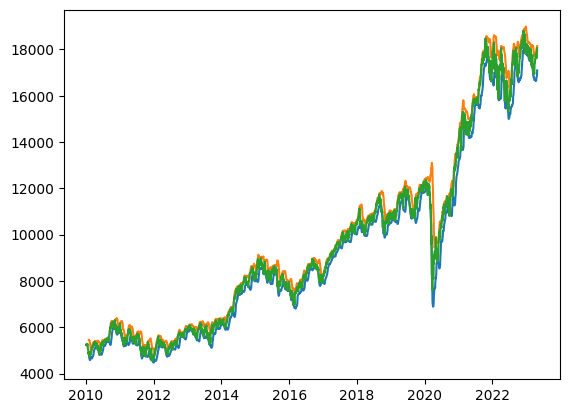

In [18]:
# code for bollinder bands and its graph
tickered =yf.download("^NSEI","2010-01-01" ,"2023-05-01")
def bollinger_bands(df, n):
    data = df['Close']
    B_MA = pd.Series((data.rolling(n, min_periods=n).mean()), name='B_MA')
    sigma = data.rolling(n, min_periods=n).std() 
    BU = pd.Series((B_MA + 2 * sigma), name='BU')
    BL = pd.Series((B_MA - 2* sigma), name='BL')
    df['bbl'] = df.index.map(BL)
    df['bbh'] = df.index.map(BU)
    df["B_MA"] =df.index.map(B_MA)
    return df
t = bollinger_bands(tickered,20)
plt.plot(t['bbl'])
plt.plot(t['bbh'])
plt.plot(t['Close'])
plt.show()

In [19]:
# stratergy for bollinder bands for getting buy and sell dates 
def implement_bb_strategy(prices, bb_upper, bb_lower):
    buy_date = []
    sell_date = []
    bb_signal = []
    signal = 0
    
    for i in range(len(prices)):
        if prices[i] < bb_lower[i] and prices[i+1] > prices[i]:
            if signal != 1:
                buy_date.append(prices.index[i])
                sell_date.append(np.nan)
                signal = 1
                bb_signal.append(signal)
            else:
                buy_date.append(np.nan)
                sell_date.append(np.nan)
                bb_signal.append(0)
        elif prices[i] > bb_upper[i] and prices[i+1] < prices[i]:
            if signal != -1:
                buy_date.append(np.nan)
                sell_date.append(prices.index[i])
                signal = -1
                bb_signal.append(signal)
            else:
                buy_date.append(np.nan)
                sell_date.append(np.nan)
                bb_signal.append(0)
        else:
            buy_date.append(np.nan)
            sell_date.append(np.nan)
            bb_signal.append(0)
            
    return buy_date, sell_date, bb_signal

buy_date, sell_date, bb_signal = implement_bb_strategy(t['Close'], t['bbh'], t['bbl'])
buy_date= [incom for incom in buy_date if str(incom) != 'nan']
buy_date

[Timestamp('2010-05-07 00:00:00'),
 Timestamp('2011-01-11 00:00:00'),
 Timestamp('2011-05-05 00:00:00'),
 Timestamp('2011-11-21 00:00:00'),
 Timestamp('2012-05-04 00:00:00'),
 Timestamp('2012-07-26 00:00:00'),
 Timestamp('2012-10-30 00:00:00'),
 Timestamp('2013-02-11 00:00:00'),
 Timestamp('2013-06-13 00:00:00'),
 Timestamp('2014-10-16 00:00:00'),
 Timestamp('2014-12-17 00:00:00'),
 Timestamp('2015-08-24 00:00:00'),
 Timestamp('2016-09-29 00:00:00'),
 Timestamp('2017-06-28 00:00:00'),
 Timestamp('2017-08-11 00:00:00'),
 Timestamp('2017-09-27 00:00:00'),
 Timestamp('2018-03-07 00:00:00'),
 Timestamp('2018-09-11 00:00:00'),
 Timestamp('2020-02-03 00:00:00'),
 Timestamp('2020-09-24 00:00:00'),
 Timestamp('2021-01-29 00:00:00'),
 Timestamp('2021-11-22 00:00:00'),
 Timestamp('2022-02-24 00:00:00'),
 Timestamp('2022-09-29 00:00:00'),
 Timestamp('2022-12-23 00:00:00')]

In [20]:
sell_date= [incom for incom in sell_date if str(incom) != 'nan']
sell_date

[Timestamp('2010-03-03 00:00:00'),
 Timestamp('2010-07-13 00:00:00'),
 Timestamp('2011-03-31 00:00:00'),
 Timestamp('2011-10-28 00:00:00'),
 Timestamp('2012-01-17 00:00:00'),
 Timestamp('2012-06-08 00:00:00'),
 Timestamp('2012-09-17 00:00:00'),
 Timestamp('2012-11-30 00:00:00'),
 Timestamp('2013-04-25 00:00:00'),
 Timestamp('2013-09-11 00:00:00'),
 Timestamp('2014-11-28 00:00:00'),
 Timestamp('2015-07-17 00:00:00'),
 Timestamp('2016-05-30 00:00:00'),
 Timestamp('2017-01-27 00:00:00'),
 Timestamp('2017-07-13 00:00:00'),
 Timestamp('2017-09-12 00:00:00'),
 Timestamp('2018-01-15 00:00:00'),
 Timestamp('2018-07-12 00:00:00'),
 Timestamp('2019-09-23 00:00:00'),
 Timestamp('2020-06-03 00:00:00'),
 Timestamp('2020-11-11 00:00:00'),
 Timestamp('2021-07-15 00:00:00'),
 Timestamp('2022-01-05 00:00:00'),
 Timestamp('2022-07-08 00:00:00'),
 Timestamp('2022-11-01 00:00:00')]

In [21]:
# taking dates between buy and sell dates for calculating metrices
masked = (t.index > '2010-05-07 ') & (t.index <= '2010-07-13')
mask5 = t.loc[masked]

In [22]:
#code of the metrices retrieved from assignment 1
Indices=pd.DataFrame(index=["Cumulative Returns","Volatility","Sharpe ratio","Sortino ratio","MDD","MACD"],columns=['^IXIC','^NSEI'])
for stock in Indices.columns:
    stok=yf.download(stock,start="2010-01-01",end="2023-05-01")
    
    closing_price=stok["Close"]
    opening_price=stok["Open"]
    daily_returns=(closing_price-opening_price)/closing_price

    final_price=stok.iloc[-1]["Close"]
    original_price=stok.iloc[0]["Open"]

    cumulative=(final_price-original_price)/original_price
    Indices.at["Cumulative Returns",stock]=cumulative
    rfrate = 0.0525
    std=daily_returns.std()
    time_period=stok.shape[0]
    volatility=std*sqrt(time_period)
    Indices.at["Volatility",stock]=volatility

    excess=daily_returns-rfrate
    sharpe=excess.mean()/excess.std()

    Indices.at["Sharpe ratio",stock]=sharpe
    
    negative_returns=daily_returns[daily_returns<0]
    sortino=excess.mean()/negative_returns.std()

    Indices.at["Sortino ratio",stock]=sortino

    peak=closing_price.max()
    index=list(np.where(closing_price==peak))
    index=index[0][0]

    indices=closing_price.index
    peak_day=indices[index]

    peak_day=peak_day.strftime("%Y-%m-%d")

    stck_later=stok.loc[peak_day:"2023-04-26",:]
    minimum=stck_later["Close"].min()
    Mdd=(minimum-peak)/peak*100

    Indices.at["MDD",stock]=Mdd

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [23]:
Indices

,^IXIC,^NSEI
Cumulative Returns,4.328856,2.473437
Volatility,0.586643,0.523497
Sharpe ratio,-5.167094,-5.81691
Sortino ratio,-6.616088,-8.039478
MDD,-36.39528,-9.92664
MACD,NaN,NaN


In [24]:
#for ketlner code sharpe ratio, cumulative returns
stok = mask2
closing_price=stok["Close"]
opening_price=stok["Open"]
daily_returns=(closing_price-opening_price)/closing_price

final_price=stok.iloc[-1]["Close"]
original_price=stok.iloc[0]["Open"]

cumulative=(final_price-original_price)/original_price
rfrate = 0.0525
std=daily_returns.std()
time_period=stok.shape[0]
volatility=std*sqrt(time_period)

excess=abs(daily_returns-rfrate)
sharpe=excess.mean()/excess.std()
print(sharpe)
print(cumulative)
peak=closing_price.max()
index=list(np.where(closing_price==peak))
index=index[0][0]

indices=closing_price.index
peak_day=indices[index]

peak_day=peak_day.strftime("%Y-%m-%d")

stck_later=stok.loc["2010-01-27":"2010-03-08"]
minimum=stck_later["Close"].min()
Mdd=(minimum-peak)/peak*100
print(Mdd)

4.805868136177326
0.05367057371992597
-7.910813771589578


In [25]:
## for bollinder bands sharpe ratio, cumulative returns, Mdd

In [26]:
stok = mask5
closing_price=stok["Close"]
opening_price=stok["Open"]
daily_returns=(closing_price-opening_price)/closing_price

final_price=stok.iloc[-1]["Close"]
original_price=stok.iloc[0]["Open"]

cumulative=(final_price-original_price)/original_price
rfrate = 0.0525
std=daily_returns.std()
time_period=stok.shape[0]
volatility=std*sqrt(time_period)

excess=abs(daily_returns-rfrate)
sharpe=excess.mean()/excess.std()
print(sharpe)
print(cumulative)
peak=closing_price.max()
index=list(np.where(closing_price==peak))
index=index[0][0]

indices=closing_price.index
peak_day=indices[index]

peak_day=peak_day.strftime("%Y-%m-%d")

stck_later=stok.loc["2010-05-07":"2010-07-13"]
minimum=stck_later["Close"].min()
Mdd=(minimum-peak)/peak*100
print(Mdd)

3.951866133657266
0.07441407659660612
-10.996822846932032


In [27]:
# macd line sharpe ratio , Mdd , cumulative returns 

In [28]:
stok = mask8
closing_price=stok["Close"]
opening_price=stok["Open"]
daily_returns=(closing_price-opening_price)/closing_price

final_price=stok.iloc[-1]["Close"]
original_price=stok.iloc[0]["Open"]

cumulative=(final_price-original_price)/original_price
rfrate = 0.0525
std=daily_returns.std()
time_period=stok.shape[0]
volatility=std*sqrt(time_period)

excess=abs(daily_returns-rfrate)
sharpe=excess.mean()/excess.std()
print(sharpe)
print(cumulative)
peak=closing_price.max()
index=list(np.where(closing_price==peak))
index=index[0][0]

indices=closing_price.index
peak_day=indices[index]

peak_day=peak_day.strftime("%Y-%m-%d")

stck_later=stok.loc["2010-01-05":"2010-01-11"]
minimum=stck_later["Close"].min()
Mdd=(minimum-peak)/peak*100
print(Mdd)

18.451382828647525
-0.012835937071418864
-0.7014617376186614


In [29]:
# I was unable to optimise the paramters .